In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import json
import os 
from sklearn.preprocessing import StandardScaler


## 資料前處理

In [161]:
label_mapping = {
    '11': '1-1','10': '1-2','9': '1-3','8': '1-4','7': '1-5','6': '1-6','5': '1-7','4': '1-8','3': '1-9','2': '1-10','1': '1-11',
    '12': '2-1','30': '2-11',
    '13': '3-1','29': '3-11',
    '14': '4-1','28': '4-11',
    '15': '5-1','27': '5-11',
    '16': '6-1','17': '6-2','18': '6-3','19': '6-4','20': '6-5','21': '6-6','22': '6-7','23': '6-8','24': '6-9','25': '6-10','26': '6-11',
    '49': '7-1','31': '7-11',
    '48': '8-1','32': '8-11',
    '47': '9-1','33': '9-11',
    '46': '10-1','34': '10-11',
    '45': '11-1','44': '11-2','43': '11-3','42': '11-4','41': '11-5','40': '11-6','39': '11-7','38': '11-8','37': '11-9','36': '11-10','35': '11-11'
}

In [ ]:
# path_template = 'standalized_timestamp_allignment_{date}_rtt_logs.csv'
# path_template = 'timestamp_allignment_Balanced_{date}_rtt_logs.csv'

path_template = 'timestamp_allignment_Balanced_2024_12_14_rtt_logs_withcorrected_distance.csv'
# path = 'All together\\14_21_27datacombine.csv'

selected_columns = ['Label', 'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi','AP1_Distance (mm)','AP4_Distance (mm)']

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)'] 

# selected_columns = ['Label', 'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi',
#                     'AP1_StdDev (mm)','AP2_StdDev (mm)','AP3_StdDev (mm)','AP4_StdDev (mm)'] 

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)',
#                     'AP1_Rssi','AP2_Rssi']

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)',
#                     'AP1_StdDev (mm)','AP2_StdDev (mm)','AP3_StdDev (mm)','AP4_StdDev (mm)']   

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)',
#                     'AP1_StdDev (mm)','AP2_StdDev (mm)','AP3_StdDev (mm)','AP4_StdDev (mm)',
#                     'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']  

# selected_columns = ['Label', 'AP1_Corrected Distance (mm)','AP2_Corrected Distance (mm)','AP3_Corrected Distance (mm)','AP4_Corrected Distance (mm)',
#                     'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']

# selected_columns = ['Label', 'AP1_Corrected Distance (mm)','AP2_Corrected Distance (mm)','AP3_Corrected Distance (mm)','AP4_Corrected Distance (mm)']

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP1_Rssi','AP2_Rssi', 'AP1_Corrected Distance (mm)','AP2_Corrected Distance (mm)']

In [163]:
date = '2024_12_14'
path = path_template.format(date=date)
path

'timestamp_allignment_Balanced_2024_12_14_rtt_logs_withcorrected_distance.csv'

In [164]:
ti = "49 RP AP1, AP2 update"

In [165]:
data = pd.read_csv(path, usecols=selected_columns)

test_size=0.2
val_size=0.1

target_column = 'Label'  # 替換成目標欄位名稱

# 替換目標欄位的 label
data[target_column] = data[target_column].astype(str).map(label_mapping)

# 只對需要映射的值進行處理，保留已正確的值
data[target_column] = data[target_column].apply(
    lambda x: label_mapping[x] if x in label_mapping else x
)

# 確認是否有未映射的值
unmapped_values = data[target_column][data[target_column].isna()].unique()
if len(unmapped_values) > 0:
    print("以下值未找到對應的映射：", unmapped_values)

# # 確認是否有未映射的值
# unmapped_values = data[target_column][~data[target_column].isin(label_mapping.values())].unique()
# if len(unmapped_values) > 0:
#     print("以下值未找到對應的映射：", unmapped_values)

data


,Label,AP1_Distance (mm),AP3_Distance (mm),AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,1-11,718.0,7432.0,-60.0,-68.0,-61.0,-59.0
1,1-11,639.0,6930.0,-62.0,-70.0,-59.0,-59.0
2,1-11,678.0,7471.0,-61.0,-69.0,-62.0,-55.0
3,1-11,718.0,7627.0,-62.0,-69.0,-63.0,-55.0
4,1-11,561.0,7471.0,-61.0,-70.0,-62.0,-55.0
...,...,...,...,...,...,...,...
19644,7-1,7280.0,9678.0,-64.0,-66.0,-61.0,-58.0
19645,7-1,6309.0,8503.0,-67.0,-75.0,-62.0,-59.0
19646,7-1,6811.0,9883.0,-64.0,-66.0,-61.0,-57.0
19647,7-1,7837.0,9511.0,-66.0,-65.0,-59.0,-58.0


### 資料切割

### 資料前處理


In [166]:
label_column = 'Label'

In [167]:
# 資料前處理 (一): 刪除前後n筆資料
n = 20
# 確保依據Label排序
data = data.sort_values(by=label_column).reset_index(drop=True)

# 建立一個空的 DataFrame 用於存放處理後的資料
processed_data = pd.DataFrame(columns=data.columns)

# 針對每個Label群組進行處理
for label, group in data.groupby(label_column):
    # 刪除前n筆和後n筆資料
    if len(group) > 2 * n:  # 確保群組資料足夠
        group = group.iloc[n:-n]
    else:
        group = pd.DataFrame()  # 若資料不足，刪除整個群組
    # 將處理後的群組資料加入
    processed_data = pd.concat([processed_data, group], ignore_index=True)

processed_data


C:\Users\吳定洋\AppData\Local\Temp\ipykernel_9096\3563538803.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  processed_data = pd.concat([processed_data, group], ignore_index=True)


,Label,AP1_Distance (mm),AP3_Distance (mm),AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,1-1,4233.0,11650.0,-61.0,-73.0,-67.0,-55.0
1,1-1,3838.0,11611.0,-53.0,-73.0,-67.0,-55.0
2,1-1,4155.0,11924.0,-62.0,-73.0,-66.0,-49.0
3,1-1,3960.0,12041.0,-62.0,-72.0,-65.0,-54.0
4,1-1,3960.0,11650.0,-63.0,-72.0,-67.0,-54.0
...,...,...,...,...,...,...,...
17684,9-11,1772.0,2861.0,-58.0,-70.0,-52.0,-66.0
17685,9-11,1733.0,2939.0,-57.0,-69.0,-52.0,-66.0
17686,9-11,1694.0,2900.0,-57.0,-69.0,-52.0,-61.0
17687,9-11,1616.0,2861.0,-58.0,-70.0,-53.0,-66.0


In [168]:
# Calculate the number of rows with NaN values
nan_rows = processed_data.isnull().any(axis=1).sum()

# Print the result
print(f"Number of rows with NaN values: {nan_rows}")

# 找出包含 NaN 的列
rows_with_nan = processed_data[processed_data.isnull().any(axis=1)]

# 印出這些列
print("Rows with NaN values:")
print(rows_with_nan)

Number of rows with NaN values: 951
Rows with NaN values:
      Label  AP1_Distance (mm)  AP3_Distance (mm)  AP1_Rssi  AP2_Rssi  \
24      1-1             4311.0                NaN     -63.0     -72.0   
46      1-1             4116.0            11963.0     -62.0     -72.0   
49      1-1                NaN                NaN       NaN       NaN   
60      1-1                NaN            12354.0       NaN       NaN   
71      1-1             4194.0                NaN     -61.0     -71.0   
...     ...                ...                ...       ...       ...   
17556  9-11                NaN                NaN       NaN     -69.0   
17575  9-11             1538.0                NaN     -58.0     -70.0   
17597  9-11                NaN                NaN       NaN       NaN   
17657  9-11                NaN                NaN       NaN       NaN   
17683  9-11             1577.0             2783.0     -57.0       NaN   

       AP3_Rssi  AP4_Rssi  
24          NaN       NaN  
46       

### 選一個做

In [169]:
data_imputed = processed_data.groupby(label_column).apply(
    lambda group: group.fillna(group.mean())
).reset_index()
data_imputed


,Label,level_1,AP1_Distance (mm),AP3_Distance (mm),AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,1-1,0,4233.0,11650.0,-61.0,-73.0,-67.0,-55.0
1,1-1,1,3838.0,11611.0,-53.0,-73.0,-67.0,-55.0
2,1-1,2,4155.0,11924.0,-62.0,-73.0,-66.0,-49.0
3,1-1,3,3960.0,12041.0,-62.0,-72.0,-65.0,-54.0
4,1-1,4,3960.0,11650.0,-63.0,-72.0,-67.0,-54.0
...,...,...,...,...,...,...,...,...
17684,9-11,17684,1772.0,2861.0,-58.0,-70.0,-52.0,-66.0
17685,9-11,17685,1733.0,2939.0,-57.0,-69.0,-52.0,-66.0
17686,9-11,17686,1694.0,2900.0,-57.0,-69.0,-52.0,-61.0
17687,9-11,17687,1616.0,2861.0,-58.0,-70.0,-53.0,-66.0


## 選擇使用 model

# K-fold

### KNN & evaluation:accuracy


In [170]:
label_to_coordinates = {
    "1-1": (0, 0), "1-2": (0.6, 0), "1-3": (1.2, 0), "1-4": (1.8, 0), "1-5": (2.4, 0), "1-6": (3.0, 0),"1-7": (3.6, 0), "1-8": (4.2, 0), "1-9": (4.8, 0), "1-10": (5.4, 0), "1-11": (6.0, 0),
    "2-1": (0, 0.6), "2-11": (6.0, 0.6),
    "3-1": (0, 1.2), "3-11": (6.0, 1.2),
    "4-1": (0, 1.8), "4-11": (6.0, 1.8),
    "5-1": (0, 2.4), "5-11": (6.0, 2.4),
    "6-1": (0, 3.0), "6-2": (0.6, 3.0), "6-3": (1.2, 3.0), "6-4": (1.8, 3.0), "6-5": (2.4, 3.0),"6-6": (3.0, 3.0), "6-7": (3.6, 3.0), "6-8": (4.2, 3.0), "6-9": (4.8, 3.0), "6-10": (5.4, 3.0), "6-11": (6.0, 3.0),
    "7-1": (0, 3.6), "7-11": (6.0, 3.6),
    "8-1": (0, 4.2), "8-11": (6.0, 4.2),
    "9-1": (0, 4.8), "9-11": (6.0, 4.8),
    "10-1": (0, 5.4), "10-11": (6.0, 5.4),
    "11-1": (0, 6.0), "11-2": (0.6, 6.0), "11-3": (1.2, 6.0), "11-4": (1.8, 6.0), "11-5": (2.4, 6.0),"11-6": (3.0, 6.0), "11-7": (3.6, 6.0), "11-8": (4.2, 6.0), "11-9": (4.8, 6.0), "11-10": (5.4, 6.0), "11-11": (6.0, 6.0)
}

In [171]:
k = 5
n_neighbors = 5
# report files
file_path = 'knn_report_{date}.txt'

In [172]:
# Step 3: 修改為支持 K-fold 的 KNN 評估並計算平均混淆矩陣
kf = KFold(n_splits=k, shuffle=True, random_state=42)
overall_accuracy = []
fold_reports = []

overall_mde = []  # 用於儲存每個 fold 的平均 MDE
mde_report = {}


# 初始化儲存所有 folds 的真實值和預測值
all_y_test = []
all_y_test_pred = []

# 把label部分拿掉
X = data_imputed.drop(columns=['level_1','Label'])
y = data_imputed[target_column]

print("X type")
print(X.dtypes)
print("y type")
print(y.dtypes)

# 使用 Z-score 標準化
scaler = StandardScaler()
selected_columns.remove('Label')
X[selected_columns] = scaler.fit_transform(X[selected_columns])


X

X type
AP1_Distance (mm)    float64
AP3_Distance (mm)    float64
AP1_Rssi             float64
AP2_Rssi             float64
AP3_Rssi             float64
AP4_Rssi             float64
dtype: object
y type
object


,AP1_Distance (mm),AP3_Distance (mm),AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,0.615778,1.822815,-0.120783,-1.059321,-1.674492,0.415218
1,0.449047,1.808008,1.584552,-1.059321,-1.674492,0.415218
2,0.582854,1.926839,-0.333950,-1.059321,-1.484683,1.345117
3,0.500544,1.971258,-0.333950,-0.876413,-1.294873,0.570201
4,0.500544,1.822815,-0.547117,-0.876413,-1.674492,0.570201
...,...,...,...,...,...,...
17684,-0.423016,-1.513926,0.518718,-0.510597,1.172651,-1.289597
17685,-0.439478,-1.484313,0.731885,-0.327689,1.172651,-1.289597
17686,-0.455940,-1.499120,0.731885,-0.327689,1.172651,-0.514681
17687,-0.488864,-1.513926,0.518718,-0.510597,0.982842,-1.289597


   AP1_Distance (mm)  AP3_Distance (mm)  AP1_Rssi  AP2_Rssi  AP3_Rssi  \
1           0.449047           1.808008  1.584552 -1.059321 -1.674492   
2           0.582854           1.926839 -0.333950 -1.059321 -1.484683   
4           0.500544           1.822815 -0.547117 -0.876413 -1.674492   
6           0.615778           2.015677 -0.120783 -1.059321 -1.294873   
7           0.615778           1.763589 -0.333950 -1.059321 -1.674492   

   AP4_Rssi  
1  0.415218  
2  1.345117  
4  0.570201  
6  0.415218  
7  1.345117  
Fold 1 - Accuracy: 0.9850
Fold 1 - MDE: 0.0213
   AP1_Distance (mm)  AP3_Distance (mm)  AP1_Rssi  AP2_Rssi  AP3_Rssi  \
0           0.615778           1.822815 -0.120783 -1.059321 -1.674492   
1           0.449047           1.808008  1.584552 -1.059321 -1.674492   
2           0.582854           1.926839 -0.333950 -1.059321 -1.484683   
3           0.500544           1.971258 -0.333950 -0.876413 -1.294873   
4           0.500544           1.822815 -0.547117 -0.876413 -1.67

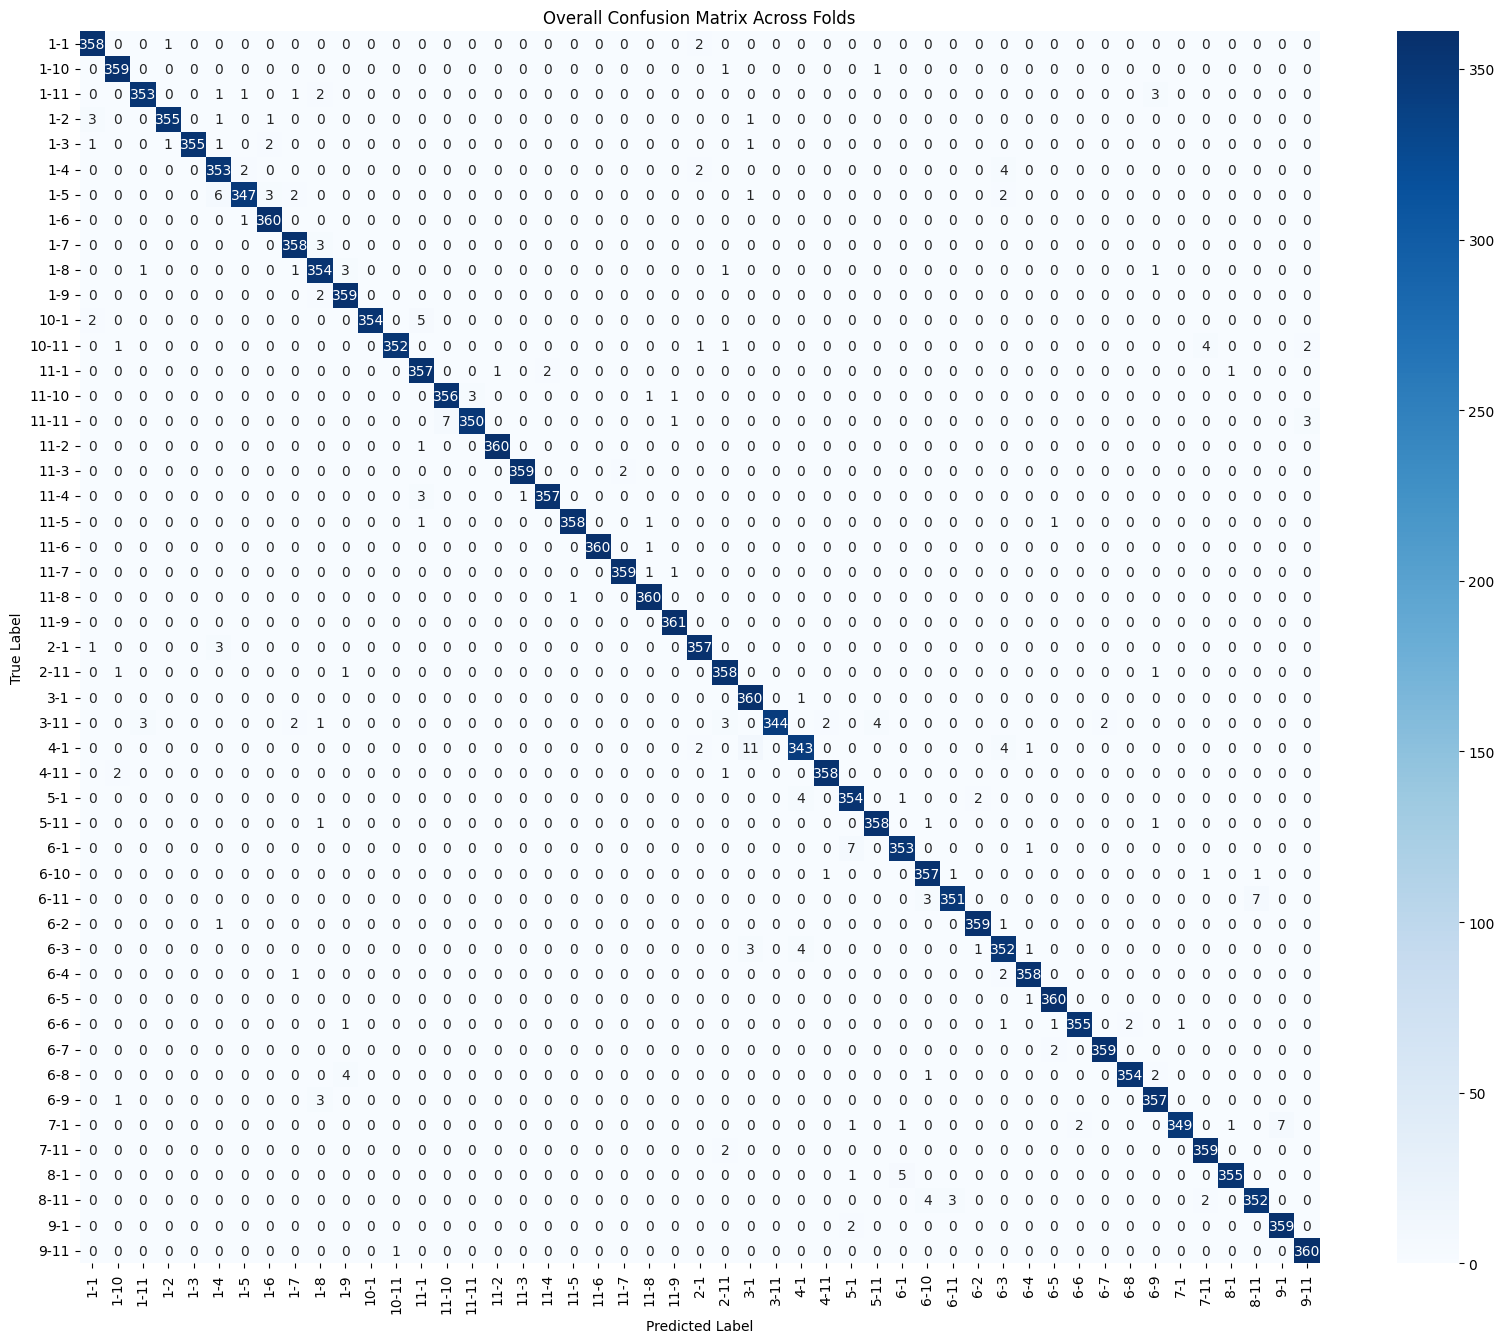

MDE report saved to: mde_report_2024_12_14.json
Classification report saved to: accuracy_report_2024_12_14.txt

Average Accuracy across 5 folds: 0.9856

Average Classification Report per Label:
Label 1-1 - Precision: 0.9809, Recall: 0.9917, F1-score: 0.9862
Label 1-10 - Precision: 0.9868, Recall: 0.9942, F1-score: 0.9904
Label 1-11 - Precision: 0.9886, Recall: 0.9775, F1-score: 0.9830
Label 1-2 - Precision: 0.9947, Recall: 0.9835, F1-score: 0.9890
Label 1-3 - Precision: 1.0000, Recall: 0.9831, F1-score: 0.9914
Label 1-4 - Precision: 0.9650, Recall: 0.9780, F1-score: 0.9712
Label 1-5 - Precision: 0.9891, Recall: 0.9603, F1-score: 0.9742
Label 1-6 - Precision: 0.9829, Recall: 0.9967, F1-score: 0.9897
Label 1-7 - Precision: 0.9801, Recall: 0.9914, F1-score: 0.9855
Label 1-8 - Precision: 0.9677, Recall: 0.9798, F1-score: 0.9736
Label 1-9 - Precision: 0.9742, Recall: 0.9951, F1-score: 0.9845
Label 10-1 - Precision: 1.0000, Recall: 0.9798, F1-score: 0.9897
Label 10-11 - Precision: 0.9971, Re

In [173]:
# #開始k fold
fold_index = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    # 建立反向映射字典
    reverse_label_mapping = {v: int(k) for k, v in label_mapping.items()}

    # 將 y_train 的字串標籤轉換為數值
    y_train_numeric = y_train.map(reverse_label_mapping)


    print(X_train.head())

    
    # 建立 KNN 模型
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn.fit(X_train, y_train_numeric)
    
    # 預測
    y_test_pred_numeric  = knn.predict(X_test)


    # 將數值標籤轉換回字串標籤
    y_test_pred_labels = [label_mapping[str(num)] for num in y_test_pred_numeric]   

    # 儲存當前 fold 的 y_test 和 y_test_pred
    all_y_test.extend(y_test)  # 累積所有真實值
    all_y_test_pred.extend(y_test_pred_labels)  # 累積所有預測值

    
    # 計算整體準確率
    accuracy = accuracy_score(y_test, y_test_pred_labels)
    overall_accuracy.append(accuracy)

    # MDE
     # Calculate MDE metrics
    y_test_pred_coordinates = np.array([label_to_coordinates[label] for label in y_test_pred_labels])
    y_test_coordinates = np.array([label_to_coordinates[label] for label in y_test])

    distances = np.linalg.norm(y_test_pred_coordinates - y_test_coordinates, axis=1)
    
    fold_mde = np.mean(distances)  # 計算當前 fold 的平均 MDE
    overall_mde.append(fold_mde)  # 儲存當前 fold 的平均 MDE
    
    # 累積 MDE 數據
    for true_label, distance in zip(y_test, distances):
        if true_label not in mde_report:
            mde_report[true_label] = []
        mde_report[true_label].append(distance)  # 累積所有 fold 的距離數據



    # 計算分類報告
    report = classification_report(
        y_test, y_test_pred_labels,
        target_names=[str(label) for label in np.unique(y)],
        zero_division=0,
        output_dict=True  # 以字典形式輸出，方便進一步分析
    )
    fold_reports.append(report)

    print(f"Fold {fold_index} - Accuracy: {accuracy:.4f}")
    print(f"Fold {fold_index} - MDE: {fold_mde:.4f}")

    fold_index += 1
    



unique_labels = sorted(np.unique(all_y_test))  # 確保標籤排序一致
# 在所有 folds 結束後，繪製總體混淆矩陣
all_cm = confusion_matrix(all_y_test, all_y_test_pred, labels=np.unique(y))

plt.figure(figsize=(20, 16))
sns.heatmap(all_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Overall Confusion Matrix Across Folds")
plt.savefig("Overall_Confusion_Matrix.png")
plt.show()

# # 計算每個標籤的平均 MDE
# avg_mde_report = {label: np.mean(distances) for label, distances in mde_report.items()}

# 計算每個標籤的平均 MDE
avg_mde_report = {label: {"mde": np.mean(distances), "count": len(distances)} for label, distances in mde_report.items()}


# 儲存到 JSON 檔案
file_path = f"mde_report_{date}.json"
# Check if the file exists, and create it if it doesn't
if not os.path.exists(file_path):
    with open(file_path, 'w') as f:
        f.write("")  # Create an empty file

with open(file_path, "w") as f:
    json.dump(avg_mde_report, f, indent=4)
print(f"MDE report saved to: {file_path}")

# 計算每個類別的平均性能
avg_report = {}
for label in np.unique(y):
    label = str(label)
    avg_report[label] = {
        "precision": np.mean([report[label]["precision"] for report in fold_reports if label in report]),
        "recall": np.mean([report[label]["recall"] for report in fold_reports if label in report]),
        "f1-score": np.mean([report[label]["f1-score"] for report in fold_reports if label in report])
    }


file_path = f'accuracy_report_{date}.txt'
# Check if the file exists, and create it if it doesn't
if not os.path.exists(file_path):
    with open(file_path, 'w') as f:
        f.write("")  # Create an empty file

# Write the classification report to the file
with open(file_path, "w") as f:
    json.dump(report, f, indent=4)

print(f"Classification report saved to: {file_path}")


# 打印所有 fold 的平均 Accuracy 和 MDE
avg_accuracy = np.mean(overall_accuracy)
avg_mde = np.mean(overall_mde)
print(f"\nAverage Accuracy across {k} folds: {avg_accuracy:.4f}")
print("\nAverage Classification Report per Label:")
for label, metrics in avg_report.items():
    print(f"Label {label} - Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1-score: {metrics['f1-score']:.4f}")
print(f"Average MDE across {k} folds: {avg_mde:.4f}")


## Accuracy 畫圖

{'1-1': {'precision': 0.9850746268656716, 'recall': 1.0, 'f1-score': 0.9924812030075187, 'support': 66.0}, '1-10': {'precision': 0.9866666666666667, 'recall': 0.9866666666666667, 'f1-score': 0.9866666666666667, 'support': 75.0}, '1-11': {'precision': 1.0, 'recall': 0.9736842105263158, 'f1-score': 0.9866666666666667, 'support': 76.0}, '1-2': {'precision': 1.0, 'recall': 0.9714285714285714, 'f1-score': 0.9855072463768116, 'support': 70.0}, '1-3': {'precision': 1.0, 'recall': 0.9857142857142858, 'f1-score': 0.9928057553956835, 'support': 70.0}, '1-4': {'precision': 0.9746835443037974, 'recall': 0.9871794871794872, 'f1-score': 0.9808917197452229, 'support': 78.0}, '1-5': {'precision': 0.9857142857142858, 'recall': 0.9452054794520548, 'f1-score': 0.965034965034965, 'support': 73.0}, '1-6': {'precision': 0.967741935483871, 'recall': 0.9836065573770492, 'f1-score': 0.975609756097561, 'support': 61.0}, '1-7': {'precision': 0.9402985074626866, 'recall': 1.0, 'f1-score': 0.9692307692307692, 'sup

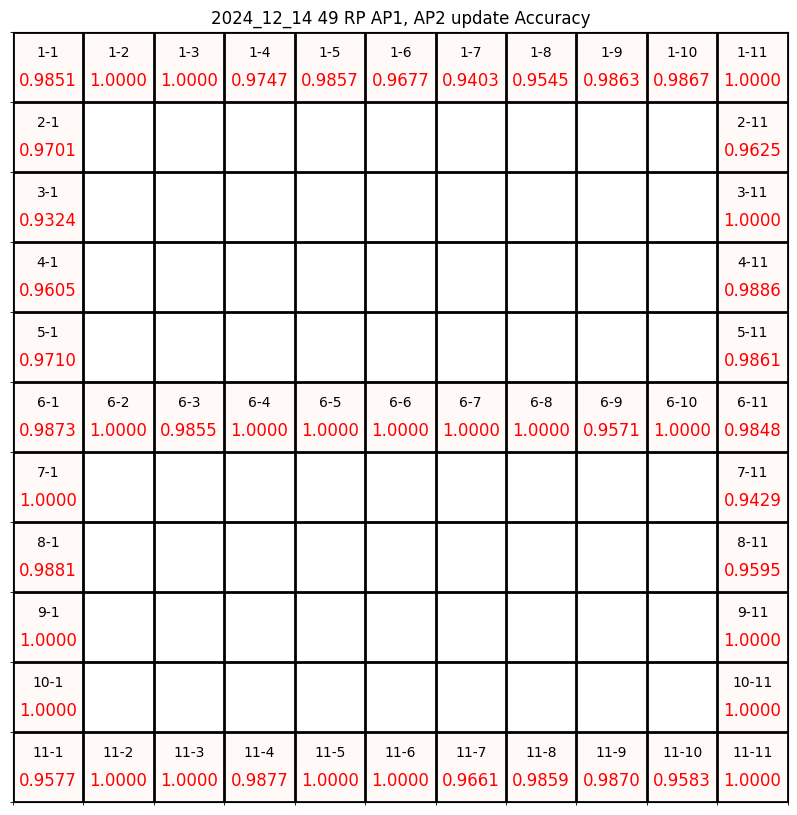

In [174]:
Title = f"{date} {ti} Accuracy"
file_path = f'accuracy_report_{date}.txt'

# Load the figure.txt JSON file
with open(file_path) as file:
    data = json.load(file)

print(data)

# Filter out keys that are not class labels (e.g., "accuracy", "macro avg")
filtered_data = {k: v for k, v in data.items() if '-' in k}

print(filtered_data)

# Extract precision values without mapping
precision_values = {k: v['precision'] for k, v in filtered_data.items()}

precision_values

# Grid layout (11x11)
rows, cols = 11, 11
grid = np.full((rows, cols), np.nan)  # Initialize grid with NaN
labels = np.empty((rows, cols), dtype=object)  # Initialize grid for labels

# Populate the grid with precision values and labels (reverse row index for correct plotting)
for key, value in precision_values.items():
    if '-' in key:
        r, c = map(int, key.split('-'))
        grid[rows - r, c - 1] = value  # Reverse rows for top-left (1-1) to bottom-left (11-1)
        labels[rows - r, c - 1] = key

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.cm.Reds_r  # Color map

# 設定自定義顏色範圍
vmin = 0  # 最小值對應的顏色
vmax = np.nanmax(grid) * 0.5  # 最大值對應的顏色 (縮小範圍讓顏色對比更明顯)

log_grid = np.log(grid + 1e-6)  # 避免取 log(0)

# Draw grid with precision values and labels
for i in range(rows):
    for j in range(cols):
        value = grid[i, j]
        label = labels[i, j]
        if not np.isnan(value):
            ax.text(j, i + 0.2, f'{label}', ha='center', va='center', color='black', fontsize=10)
            ax.text(j, i - 0.2, f'{value:.4f}', ha='center', va='center', color='red', fontsize=12)
        rect_color = cmap(value / np.nanmax(log_grid)) if not np.isnan(value) else 'white'
        ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=rect_color, alpha=0.5))


# Format grid
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.title(Title)
plt.show()

##  MDE 畫圖

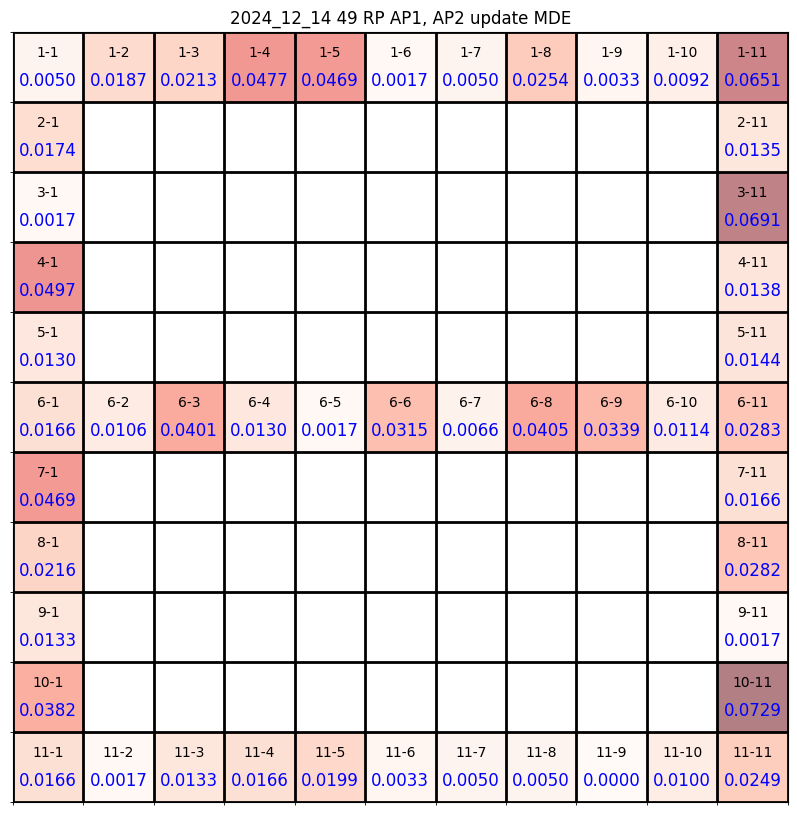

In [175]:
Title = f"{date} {ti} MDE"
file_path = f'mde_report_{date}.json'

# 載入 JSON 報告
with open(file_path) as file:
    mde_data = json.load(file)

# 將 MDE 填入網格
rows, cols = 11, 11
grid = np.full((rows, cols), np.nan)  # 初始化網格
labels = np.empty((rows, cols), dtype=object)  # 初始化標籤

# 填充網格數據
for key, value in mde_data.items():
    if '-' in key:
        r, c = map(int, key.split('-'))
        grid[rows - r, c - 1] = value["mde"]  # 反轉行索引以正確對應圖表
        labels[rows - r, c - 1] = key

# 繪製圖表
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.cm.Reds  # 顏色映射

# 畫出每個網格
for i in range(rows):
    for j in range(cols):
        value = grid[i, j]
        label = labels[i, j]
        if not np.isnan(value):
            ax.text(j, i + 0.2, f'{label}', ha='center', va='center', color='black', fontsize=10)
            ax.text(j, i - 0.2, f'{value:.4f}', ha='center', va='center', color='blue', fontsize=12)
        rect_color = cmap(value / np.nanmax(grid)) if not np.isnan(value) else 'white'
        ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=rect_color, alpha=0.5))

# 格式化圖表
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.title(Title)
plt.show()


In [176]:
# # Calculate the number of rows with NaN values
# nan_rows = data_imputed.isnull().any(axis=1).sum()

# # Print the result
# print(f"Number of rows with NaN values: {nan_rows}")

# # 找出包含 NaN 的列
# rows_with_nan = data_imputed[data_imputed.isnull().any(axis=1)]

# # 印出這些列
# print("Rows with NaN values:")
# print(rows_with_nan)


In [177]:
# # 刪除有 NAN 的 row
# data_imputed = processed_data.dropna()
# data_imputed

In [178]:
# # 線性插值法填補數值型欄位的 NaN 值
# data_imputed = processed_data.interpolate()
# data_imputed

In [179]:
# # 確定數值型與類別型欄位
# numeric_columns = processed_data.select_dtypes(include=['float', 'int']).columns
# non_numeric_columns = processed_data.select_dtypes(exclude=['float', 'int']).columns

# # 取出數值型資料
# numeric_data = processed_data[numeric_columns]

# # 使用 KNNImputer 填補數值型缺失值
# k = 5
# imputer = KNNImputer(n_neighbors=k)
# numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_columns)

# # 填補類別型資料的缺失值（使用 mode）
# categorical_data = processed_data[non_numeric_columns].copy()
# for col in categorical_data.columns:
#     if categorical_data[col].isnull().any():
#         categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)

# # 合併數值型與類別型資料
# data_imputed = pd.concat([numeric_data_imputed, categorical_data.reset_index(drop=True)], axis=1)

# # 確認結果
# data_imputed